In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)

In [3]:
def display_data(fake_data, train_data):
    fake_data = pd.DataFrame(fake_data)
    fake_data.head()

    train_data = pd.DataFrame(train_data)
    train_data.head()

    fake_data["label"] = 1
    train_data["label"] = 0
    
    data = pd.concat([fake_data, train_data])
    data.head()

    sns.pairplot(data, hue='label')

In [4]:
df = pd.read_csv('data/train.csv', header=None)
train_data = np.array(df.drop(labels=0, axis=1))

data_dim = train_data.shape[1]

power = 1.51

In [5]:
X = train_data ** (1./power)
mu = np.mean(X, axis=0)
cov = np.cov(X.T)
B = np.linalg.cholesky(cov)

In [6]:
np.corrcoef(train_data.T)

array([[1.        , 0.49182725, 0.43393579, 0.65948748],
       [0.49182725, 1.        , 0.65362005, 0.45018727],
       [0.43393579, 0.65362005, 1.        , 0.47557148],
       [0.65948748, 0.45018727, 0.47557148, 1.        ]])

In [7]:
np.corrcoef((train_data ** (1/1.51)).T)

array([[1.        , 0.4792072 , 0.43076857, 0.62609447],
       [0.4792072 , 1.        , 0.62910378, 0.41741308],
       [0.43076857, 0.62910378, 1.        , 0.4478562 ],
       [0.62609447, 0.41741308, 0.4478562 , 1.        ]])

In [8]:
def generate_data(mu, B, power, Z):
    generated = np.abs(mu + np.dot(Z, B.T)) ** power
    return generated

In [9]:
mu_Z = np.zeros(train_data.shape[1])
cov_Z = np.eye(train_data.shape[1])

In [10]:
Z = np.random.multivariate_normal(mu_Z, cov_Z, train_data.shape[0])

In [11]:
generated = generate_data(mu, B, power, Z)

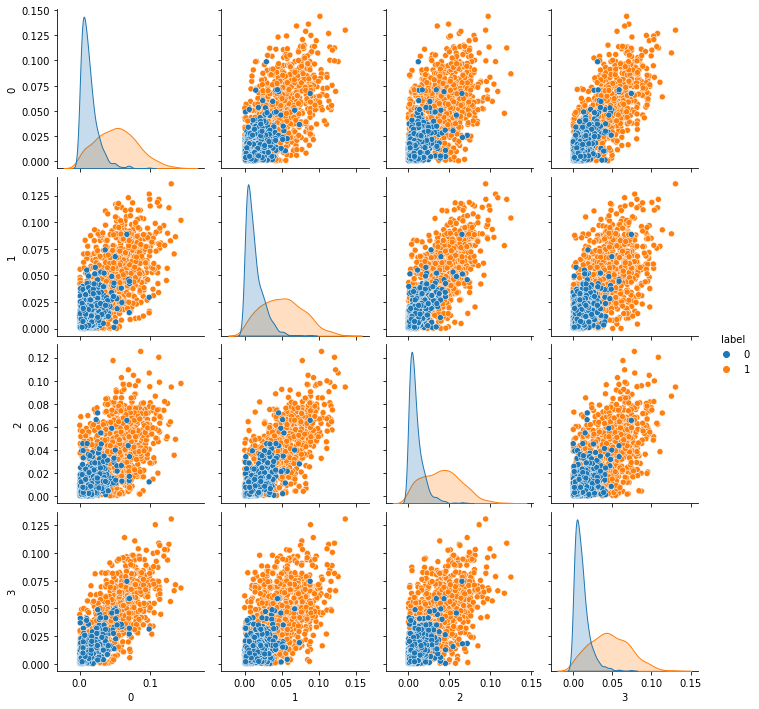

In [12]:
display_data(generated, train_data)

In [13]:
np.corrcoef(generated.T)

array([[1.        , 0.47367412, 0.41892033, 0.62372617],
       [0.47367412, 1.        , 0.63143586, 0.41034144],
       [0.41892033, 0.63143586, 1.        , 0.43894818],
       [0.62372617, 0.41034144, 0.43894818, 1.        ]])